# Import Libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Import Dataset

In [40]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Describe

In [41]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Info

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Columns

In [43]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Data Cleaning

In [44]:
dataset.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [45]:
missing_values=dataset.isna().sum()
missing_values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#  Pairplot to visualize relationships between numerical variables

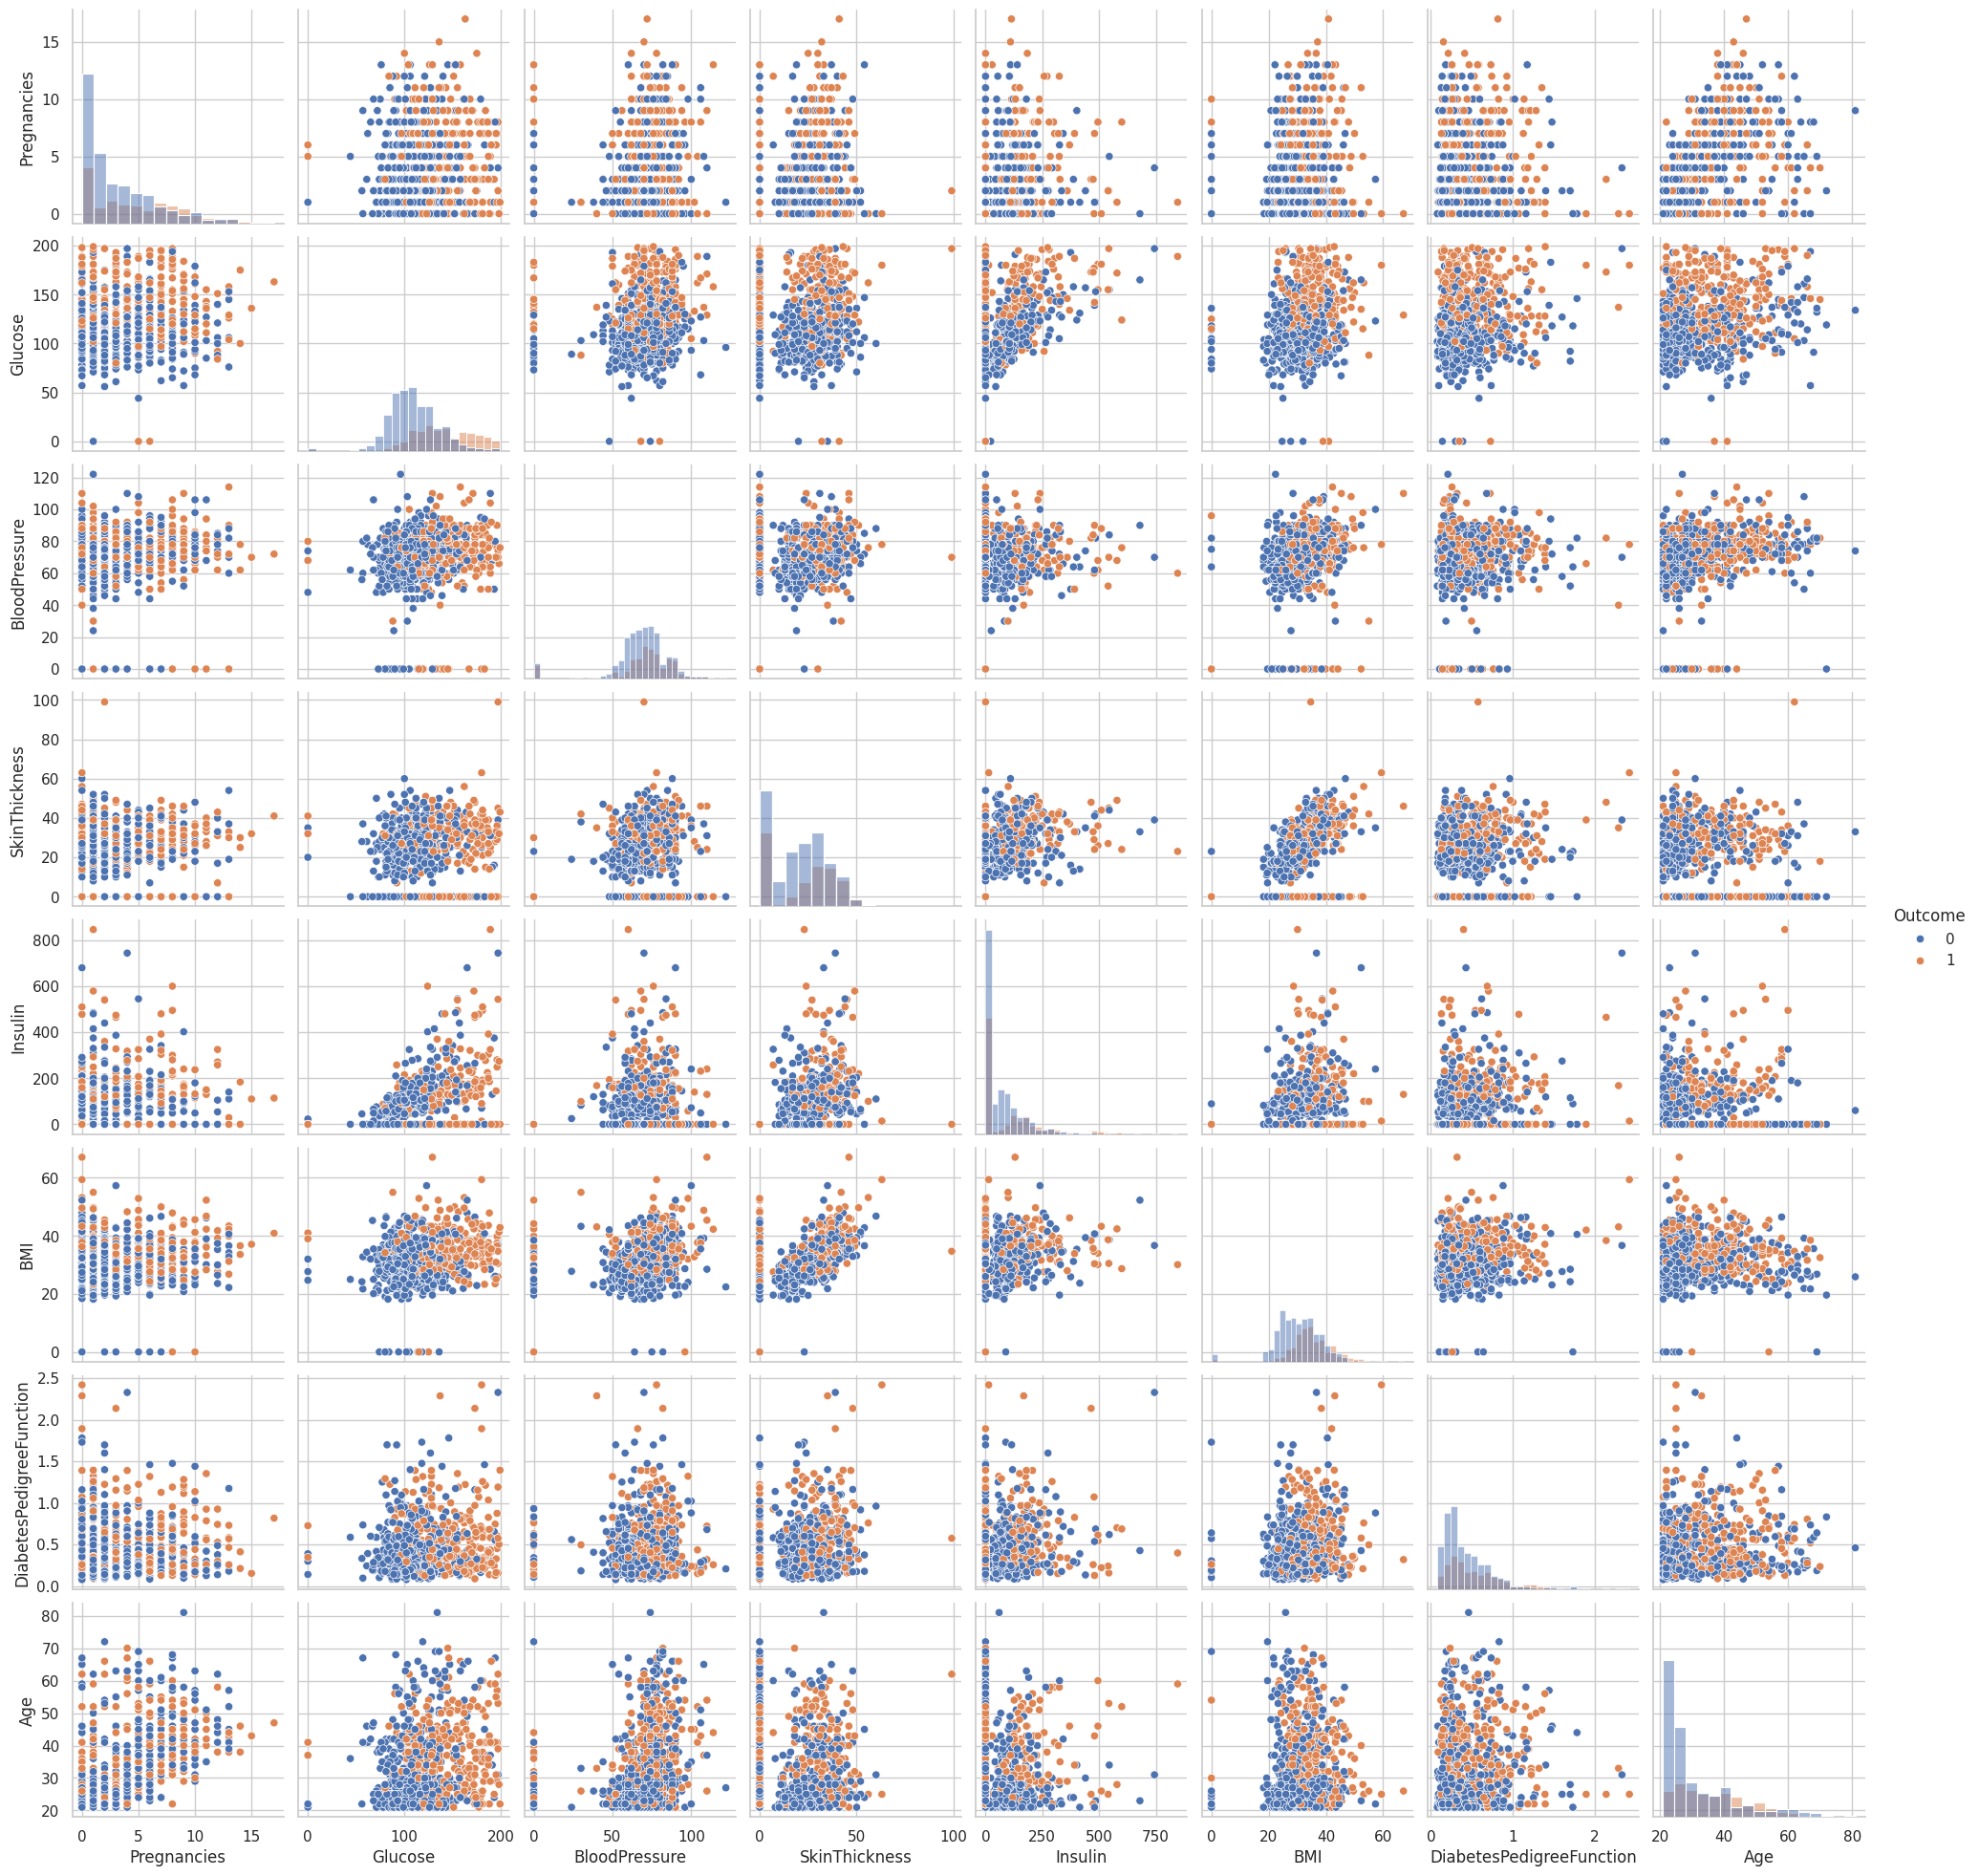

In [46]:
sns.pairplot(dataset, hue='Outcome', diag_kind='hist')
plt.show()

# Bar plot for each feature

<ipython-input-47-1d896cc75d4f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Outcome', y=column, data=dataset, ax=ax, palette='Set2', ci=None)
<ipython-input-47-1d896cc75d4f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=column, data=dataset, ax=ax, palette='Set2', ci=None)
<ipython-input-47-1d896cc75d4f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Outcome', y=column, data=dataset, ax=ax, palette='Set2', ci=None)
<ipython-input-47-1d896cc75d4f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=column, data=dataset, ax=a

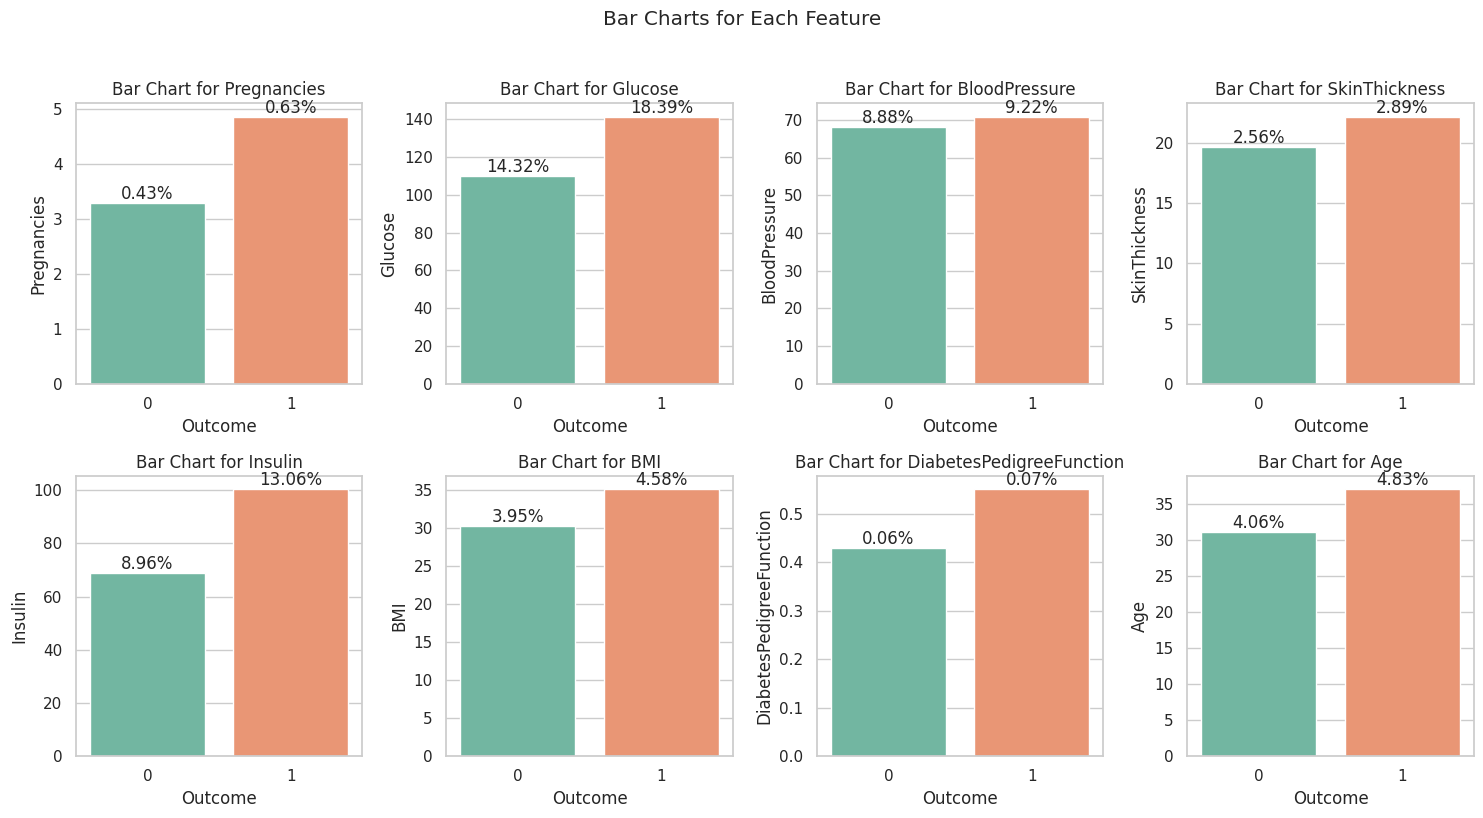

In [47]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Bar Charts for Each Feature', y=1.02)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot bar charts for each feature
for i, column in enumerate(dataset.columns[:-1]):  # Exclude the 'Outcome' column
    ax = axes[i]
    sns.barplot(x='Outcome', y=column, data=dataset, ax=ax, palette='Set2', ci=None)
    ax.set_title(f'Bar Chart for {column}')
    ax.set_xlabel('Outcome')
    ax.set_ylabel(column)

    # Add percentage labels on top of each bar
    for p in ax.patches:
        percentage = p.get_height() / len(dataset) * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Correlation matrix heatmap


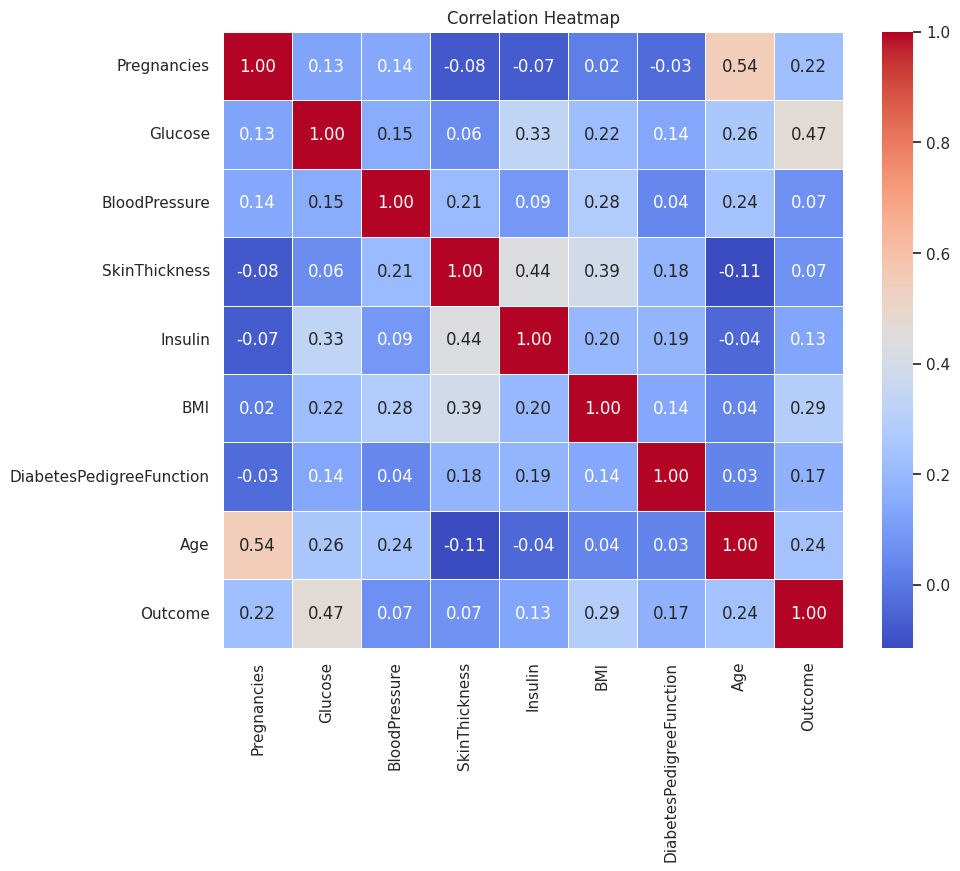

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Count plot for the 'Outcome' variable

<ipython-input-31-831f2161eb18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=dataset, palette='Set1')


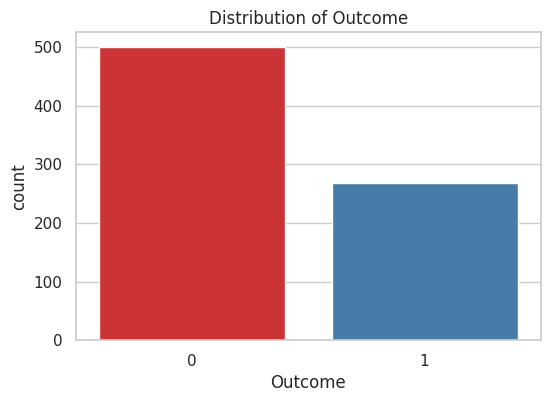

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=dataset, palette='Set1')
plt.title('Distribution of Outcome')
plt.show()

# Bar chart for 'Pregnancies' variable

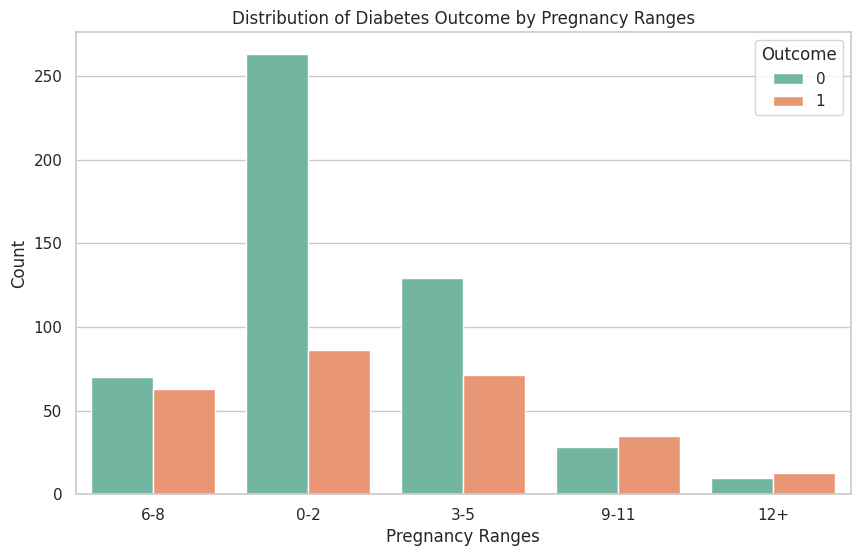

In [136]:
# Define the function to categorize pregnancy ranges
def categorize_pregnancy_range(pregnancies):
    if pregnancies <= 2:
        return '0-2'
    elif pregnancies <= 5:
        return '3-5'
    elif pregnancies <= 8:
        return '6-8'
    elif pregnancies <= 11:
        return '9-11'
    else:
        return '12+'



# Plot the distribution of outcomes by pregnancy ranges
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancy_Range', data=dataset, hue='Outcome', palette='Set2')
plt.title('Distribution of Diabetes Outcome by Pregnancy Ranges')
plt.xlabel('Pregnancy Ranges')
plt.ylabel('Count')

plt.show()

# Bar chart for 'Age' variable

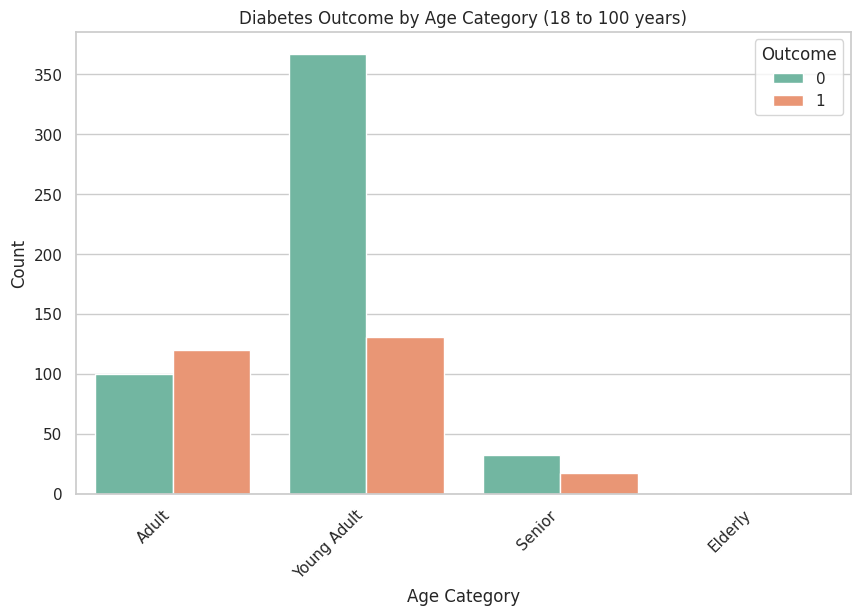

In [137]:
# Define the function to categorize age ranges
def categorize_age(age):
    if 18 <= age <= 35:
        return 'Young Adult'
    elif 36 <= age <= 55:
        return 'Adult'
    elif 56 <= age <= 75:
        return 'Senior'
    elif 76 <= age <= 100:
        return 'Elderly'
    else:
        return 'Out of Range'

# Filter data for the relevant age range and create a new column with age categories
filtered_df = dataset[(dataset['Age'] >= 18) & (dataset['Age'] <= 100)]
filtered_df['Age_Category'] = filtered_df['Age'].apply(categorize_age)

# Bar chart for 'Age_Category' variable with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Category', data=filtered_df, hue='Outcome', palette='Set2')
plt.title('Diabetes Outcome by Age Category (18 to 100 years)')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

# Bar chart for 'BloodPressure' variable

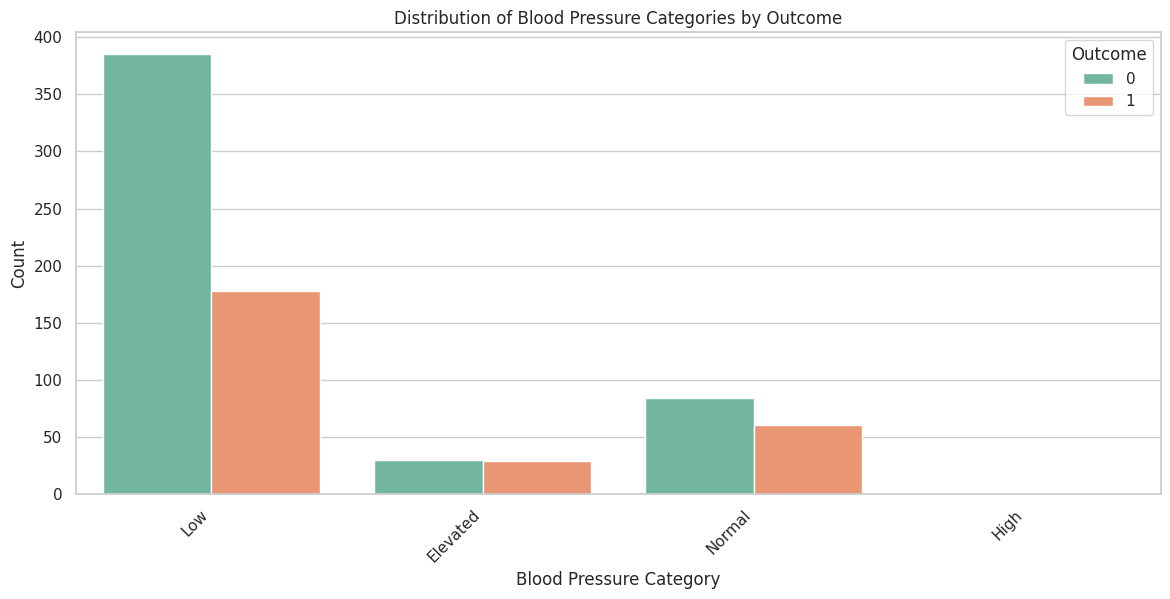

In [138]:
# Define the function to categorize blood pressure values
def categorize_blood_pressure(bp):
    if bp < 80:
        return 'Low'
    elif 80 <= bp <= 89:
        return 'Normal'
    elif 90 <= bp <= 119:
        return 'Elevated'
    else:
        return 'High'

# Apply the function to create a new column 'BloodPressure_Category'
dataset['BloodPressure_Category'] = dataset['BloodPressure'].apply(categorize_blood_pressure)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
sns.countplot(x='BloodPressure_Category', data=dataset, hue='Outcome', palette='Set2')
plt.title('Distribution of Blood Pressure Categories by Outcome')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

In [139]:
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Range,BloodPressure_Category
0,6,148,72,35,0,33.6,0.627,50,1,6-8,Low
1,1,85,66,29,0,26.6,0.351,31,0,0-2,Low
2,8,183,64,0,0,23.3,0.672,32,1,6-8,Low
3,1,89,66,23,94,28.1,0.167,21,0,0-2,Low
4,0,137,40,35,168,43.1,2.288,33,1,0-2,Low


# Slice Dataset X and Y

In [140]:
X = dataset[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y=dataset['Outcome']
print("X dataset:",X)
print("Y dataset:",y)


X dataset: [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
Y dataset: 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Splitting the dataset into the Training set and Test set

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


#  Initialize classifiers

In [142]:
classifiers = {

    'Decision Tree ': DecisionTreeClassifier(max_depth=4),
    'Support Vector Machine ': SVC(kernel='linear'),
    'K-Nearest Neighbors ': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1),

}


#  Train and evaluate each classifier


In [143]:
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': cm}

for name, result in results.items():
    print(f'{name} - Accuracy: {result["Accuracy"]:.4f}, Precision: {result["Precision"]:.4f}, Recall: {result["Recall"]:.4f}, F1 Score: {result["F1 Score"]:.4f}')


Decision Tree  - Accuracy: 0.7448, Precision: 0.6066, Recall: 0.5968, F1 Score: 0.6016
Support Vector Machine  - Accuracy: 0.8021, Precision: 0.7400, Recall: 0.5968, F1 Score: 0.6607
K-Nearest Neighbors  - Accuracy: 0.7604, Precision: 0.6481, Recall: 0.5645, F1 Score: 0.6034


#  Visualize the results


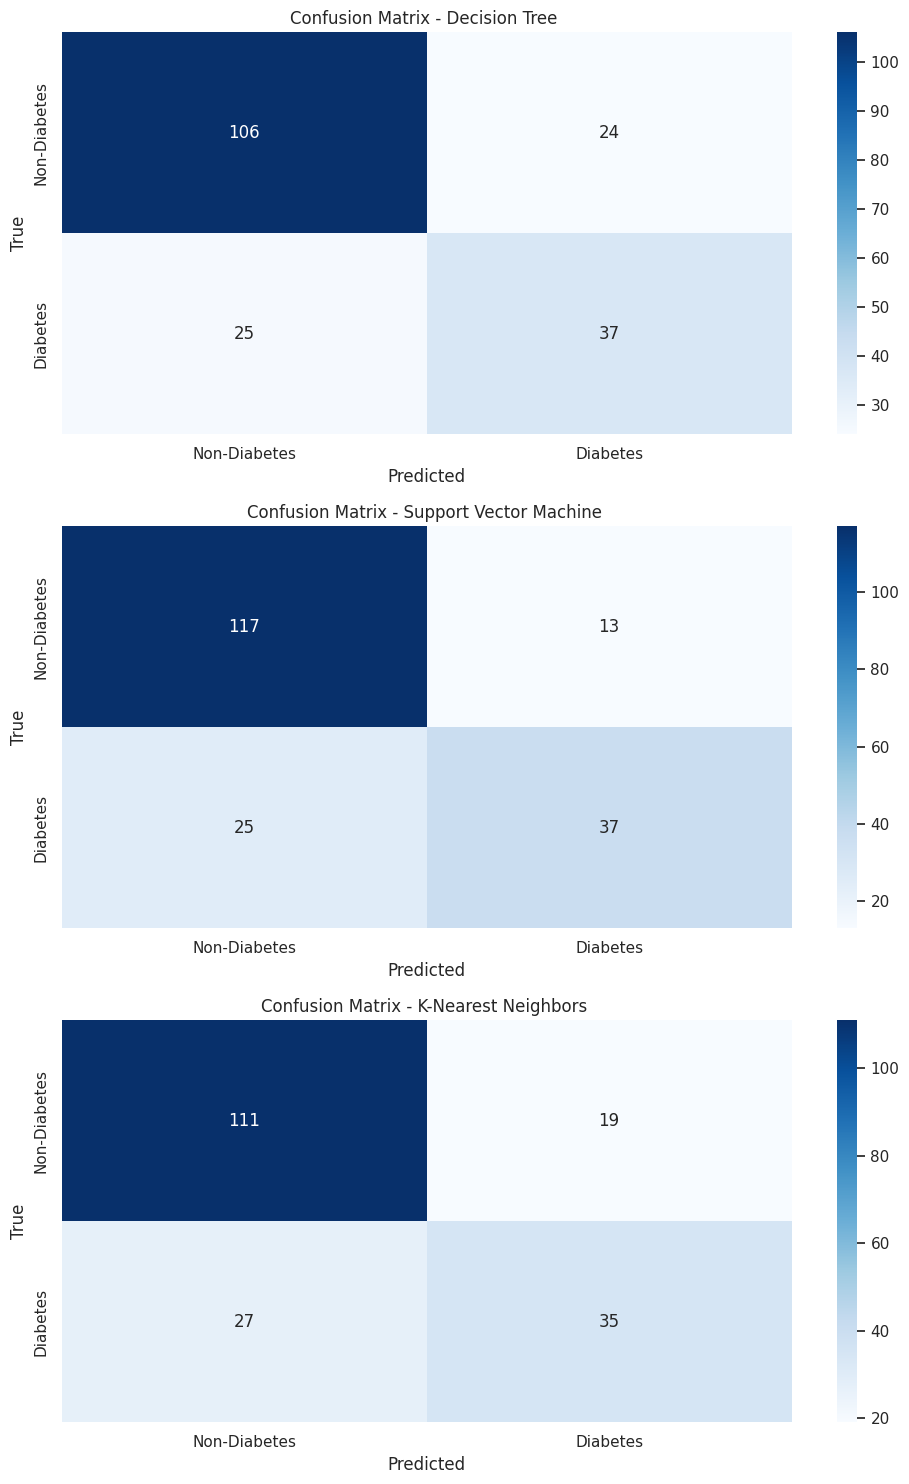

In [145]:
fig, axes = plt.subplots(len(classifiers), 1, figsize=(10, 15))

for i, (name, result) in enumerate(results.items()):
    # Visualize Confusion Matrix
    sns.heatmap(result['Confusion Matrix'], annot=True, cmap='Blues', fmt='g', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_xticklabels(['Non-Diabetes', 'Diabetes'])  # Set x-axis tick labels
    axes[i].set_yticklabels(['Non-Diabetes', 'Diabetes'])  # Set y-axis tick labels

plt.tight_layout()
plt.show()

# Visualize the accuracy results

<ipython-input-146-65893fd5d2bd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifiers_names, y=accuracy_percentages, palette='viridis')


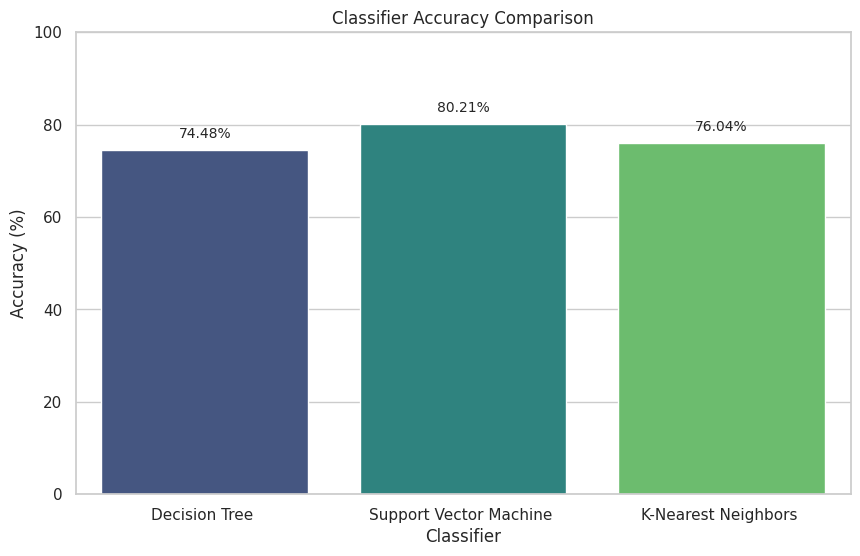

In [146]:
fig, ax = plt.subplots(figsize=(10, 6))

classifiers_names = list(results.keys())
accuracy_values = [result['Accuracy'] for result in results.values()]

# Convert accuracy values to percentages
accuracy_percentages = np.array(accuracy_values) * 100

sns.barplot(x=classifiers_names, y=accuracy_percentages, palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit to the range [0, 100] for percentages

# Display percentages on top of each bar
for i, percentage in enumerate(accuracy_percentages):
    ax.text(i, percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()